<a href="https://colab.research.google.com/github/felista47/Classification-algorithms/blob/main/Thyriod_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Thyroid Prediction Using Logistic Regresion
- Problem Statement
  - In Kenya, the recurrence of thyroid disease presents a significant challenge in healthcare management. Predicting the likelihood of recurrence based on clinical features and patient demographics could lead to improved patient outcomes, tailored treatment plans, and better resource allocation.
 - The goal of this project is to develop a logistic regression model that can accurately predict the probability of thyroid disease recurrence in patients using clinical data such as hormone levels, nodule characteristics, and patient demographics (age, gender, family history, etc.).
 - The model will assist healthcare providers in identifying high-risk patients and guiding decision-making for preventive interventions and follow-up car.
- Objectives
 - develop a logistic regression model to predict the likelihood of recurrence of Thyroid
based on clinical features and patient demographics.

# Step one
- Data Exploration

In [84]:
#Importing necessary libraries
import pandas as pd


In [85]:
#Reading the dataset
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [86]:
#Understanding the data
df.shape

(383, 17)

In [87]:
#information about the columns number, data types and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [88]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

#### classifying variable in the datasett
  - numerical variables : 'Age.' {1column}
  - categorical variable : 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred' {16 columns}



### Preprocessing steps on categorical variable

- Performing one hot encoding on the categorical variable that have 2 options i.e smoking and gender.
- For ordinal ordinal like 'T', 'N', 'M', and 'Stage' we use label encoding.

In [89]:
#descriptive Statistics analysis on numerical columns
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


# Step Three.
  - Data Cleaning

In [90]:
#Checking for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


### Methods of handling missing values if found
  - dropna() function to drop rows that have empty values in columns
  - fillna(),interpolate() function to fill missing values with a value
  - leave as is method to ignore the missing values.


### converting categorical columns to numeric

In [91]:
df['Risk'].unique()


array(['Low', 'Intermediate', 'High'], dtype=object)

In [92]:
df['T'].unique()


array(['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'], dtype=object)

In [93]:
df['N'].unique()


array(['N0', 'N1b', 'N1a'], dtype=object)

In [94]:
df['M'].unique()


array(['M0', 'M1'], dtype=object)

In [95]:
# Apply one-hot encoding to 'Gender' and 'Hx Smoking' columns separately
# For 'Gender'
df['Gender'] = pd.get_dummies(df['Gender'], dtype=int, drop_first=True)

# For 'Smoking'
df['Smoking'] = pd.get_dummies(df['Smoking'], dtype=int, drop_first=True)

# For 'Hx Smoking'
df['Hx Smoking'] = pd.get_dummies(df['Hx Smoking'], dtype=int, drop_first=True)

# For 'Hx Radiotherapy'
df['Hx Radiothreapy'] = pd.get_dummies(df['Hx Radiothreapy'], dtype=int, drop_first=True)

# For 'Focality'
df['Focality'] = pd.get_dummies(df['Focality'], dtype=int, drop_first=True)

# For 'Recurred'
df['Recurred'] = pd.get_dummies(df['Recurred'], dtype=int, drop_first=True)

df.head()


,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,1,Low,T1a,N0,M0,I,Indeterminate,0
1,34,0,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
2,30,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
3,62,0,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,1,Low,T1a,N0,M0,I,Excellent,0
4,62,0,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,0,Low,T1a,N0,M0,I,Excellent,0


In [96]:
df['Response'].unique()

array(['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete'], dtype=object)

In [97]:
# perfoming label ecncoding for categorical variables with more than one input
df["Thyroid Function"] = pd.factorize(df["Thyroid Function"])[0]
df["Physical Examination"] = pd.factorize(df["Physical Examination"])[0]
df["Adenopathy"] = pd.factorize(df["Adenopathy"])[0]
df["Pathology"] = pd.factorize(df["Pathology"])[0]
df["Risk"] = pd.factorize(df["Risk"])[0]
df["T"] = pd.factorize(df["T"])[0]
df["N"] = pd.factorize(df["N"])[0]
df["M"] = pd.factorize(df["M"])[0]
df["Stage"] = pd.factorize(df["Stage"])[0]
df["Response"] = pd.factorize(df["Response"])[0]
df.head(50)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,34,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
2,30,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0
3,62,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0
4,62,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,52,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,41,0,0,1,0,1,2,0,0,1,0,0,0,0,0,1,0
7,46,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0
8,51,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0
9,40,0,0,0,0,0,2,0,0,1,0,0,0,0,0,1,0


# Step Two.
- Data Visualization.

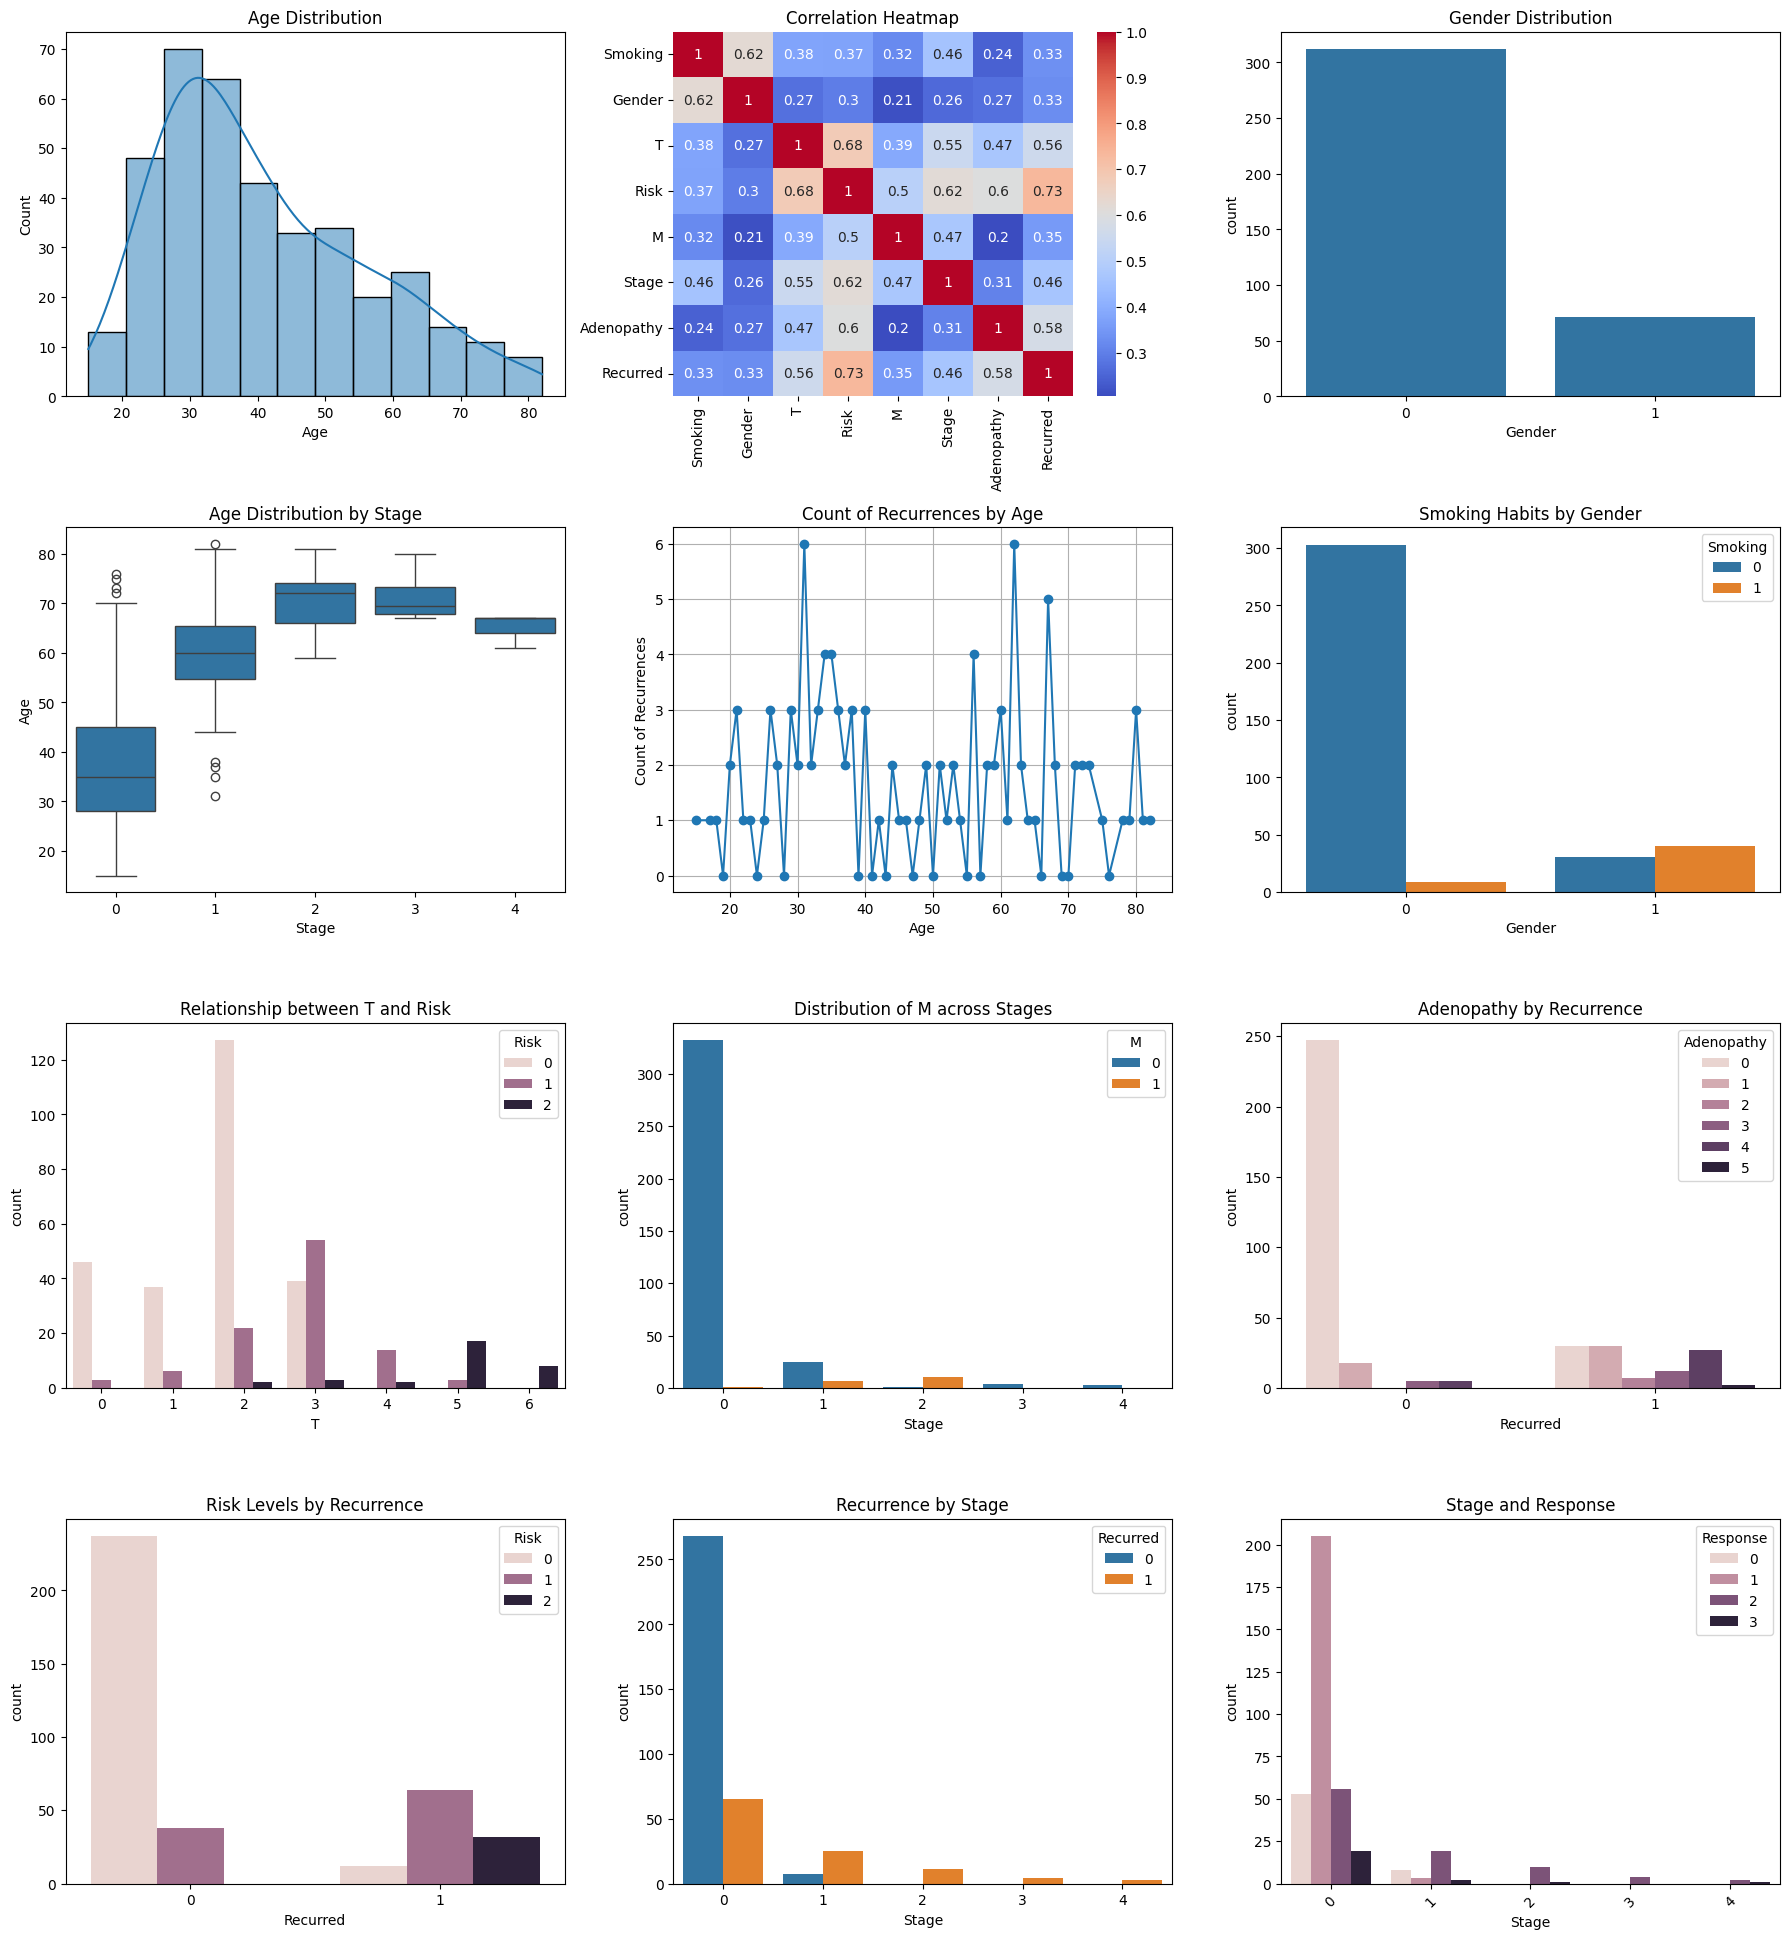

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots with appropriate size
fig, axes = plt.subplots(5, 3, figsize=(18, 24))  # 5 rows, 3 columns

# 1. Histogram for Age
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# 2. Correlation Heatmap
df_subset = df[['Smoking', 'Gender', 'T', 'Risk', 'M', 'Stage', 'Adenopathy', 'Recurred']]
corr_matrix = df_subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Correlation Heatmap')

# 3. Count Plot for Gender
sns.countplot(x='Gender', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Gender Distribution')

# 4. Violin Plot for Age by Stage
sns.boxplot(x='Stage', y='Age', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Stage')

# 5. Line Plot for Count of Recurrences by Age
age_recurred_count = df.groupby('Age')['Recurred'].sum()
axes[1, 1].plot(age_recurred_count.index, age_recurred_count.values, marker='o')
axes[1, 1].set_title('Count of Recurrences by Age')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Count of Recurrences')
axes[1, 1].grid(True)

# 6. Smoking and Gender
sns.countplot(x='Gender', hue='Smoking', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Smoking Habits by Gender')

# 7. T and Risk
sns.countplot(x='T', hue='Risk', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Relationship between T and Risk')

# 8. M and Stage
sns.countplot(x='Stage', hue='M', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of M across Stages')

# 9. Adenopathy and Recurred
sns.countplot(x='Recurred', hue='Adenopathy', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Adenopathy by Recurrence')

# 10. Risk and Recurred
sns.countplot(x='Recurred', hue='Risk', data=df, ax=axes[3, 0])
axes[3, 0].set_title('Risk Levels by Recurrence')

# 11. Recurred and Stage
sns.countplot(x='Stage', hue='Recurred', data=df, ax=axes[3, 1])
axes[3, 1].set_title('Recurrence by Stage')

# 12. Stage and Response
sns.countplot(x='Stage', hue='Response', data=df, ax=axes[3, 2])
axes[3, 2].set_title('Stage and Response')
axes[3, 2].tick_params(axis='x', rotation=45)

# Hide any remaining unused axes (if any)
for i in range(4, 5):
    for j in range(0, 3):
        fig.delaxes(axes[i, j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Smoking'),
  Text(0, 3.5, 'Hx Smoking'),
  Text(0, 4.5, 'Hx Radiothreapy'),
  Text(0, 5.5, 'Thyroid Function'),
  Text(0, 6.5, 'Physical Examination'),
  Text(0, 7.5, 'Adenopathy'),
  Text(0, 8.5, 'Pathology'),
  Text(0, 9.5, 'Focality'),
  Text(0, 10.5, 'Risk'),
  Text(0, 11.5, 'T'),
  Text(0, 12.5, 'N'),
  Text(0, 13.5, 'M'),
  Text(0, 14.5, 'Stage'),
  Text(0, 15.5, 'Response'),
  Text(0, 16.5, 'Recurred')])

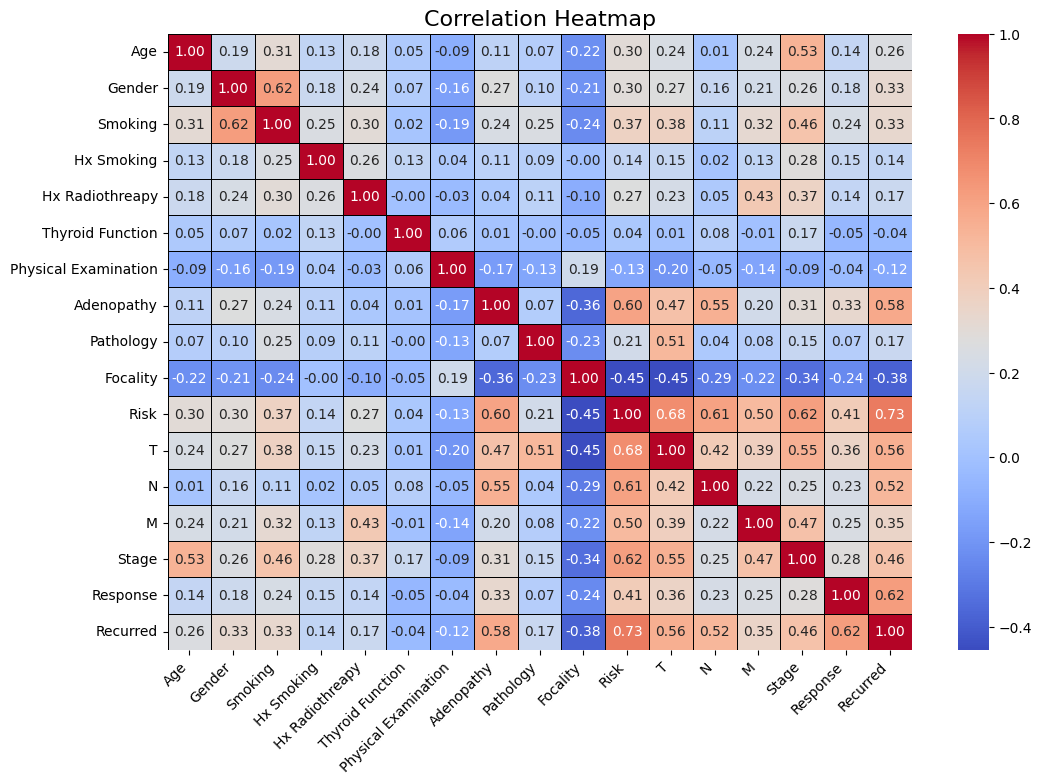

In [99]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with 'coolwarm' colormap, and improved annotation format
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            linewidths=0.5, linecolor='black')

# Adjust the title and axis labels for clarity
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Step 4
## Descriptive Statistics

In [100]:
#summary statistics (mean, median, mode, range, standard deviation) for key numerical variables which is the age
# Compute summary statistics for Age
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]  # mode() returns a Series, so we take the first element
range_age = df['Age'].max() - df['Age'].min()
std_dev_age = df['Age'].std()

# Display the statistics
summary_stats = {
    "Mean Age": mean_age,
    "Median Age": median_age,
    "Mode Age": mode_age,
    "Range of Age": range_age,
    "Standard Deviation of Age": std_dev_age
}
summary_stats


{'Mean Age': 40.866840731070496,
 'Median Age': 37.0,
 'Mode Age': 31,
 'Range of Age': 67,
 'Standard Deviation of Age': 15.134493807858814}

Mean Age : On average, people are about 40.87 years old.

Median Age :  Half of the people are younger than 37, and half are older. This indicates that the distribution of ages is somewhat skewed towards older individuals, as the mean is higher than the median.

Mode Age : Age 31 appears more often than any other age.

Range of Age : This tells you that there is a 67-year span between the youngest and oldest individuals.

Standard Deviation of Age : A standard deviation of 15.13 indicates that ages are spread out from the mean, with most individuals falling within approximately 15 years of the mean age (between about 25.7 and 56.0 years).

In [101]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assume df is your DataFrame and contains the relevant columns

# List of categorical variables to test
categorical_vars = ['Gender', 'Smoking', 'Adenopathy', 'Focality', 'Risk', 'T', 'M', 'Stage']

# Function to perform chi-square test and print results
def perform_chi2_test(df, cat_var):
    # Create a contingency table
    contingency_table = pd.crosstab(df[cat_var], df['Recurred'])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-square Test for {cat_var} and 'Recurred':")
    print("Chi-square Statistic:", chi2_stat)
    print("P-value:", p_val)
    print("Degrees of Freedom:", dof)
    print("Expected Frequencies Table:\n", expected)

    # Interpret results
    alpha = 0.05  # Significance level
    if p_val < alpha:
        print(f"There is a significant association between '{cat_var}' and 'Recurred'.")
    else:
        print(f"There is no significant association between '{cat_var}' and 'Recurred'.")
    print("\n")

# Run the test for each categorical variable
for var in categorical_vars:
    perform_chi2_test(df, var)

Chi-square Test for Gender and 'Recurred':
Chi-square Statistic: 39.396676469993665
P-value: 3.4588517738589313e-10
Degrees of Freedom: 1
Expected Frequencies Table:
 [[224.02088773  87.97911227]
 [ 50.97911227  20.02088773]]
There is a significant association between 'Gender' and 'Recurred'.


Chi-square Test for Smoking and 'Recurred':
Chi-square Statistic: 40.34407383079646
P-value: 2.129503925882454e-10
Degrees of Freedom: 1
Expected Frequencies Table:
 [[239.81723238  94.18276762]
 [ 35.18276762  13.81723238]]
There is a significant association between 'Smoking' and 'Recurred'.


Chi-square Test for Adenopathy and 'Recurred':
Chi-square Statistic: 157.04429320211565
P-value: 4.220720693153291e-32
Degrees of Freedom: 5
Expected Frequencies Table:
 [[198.89033943  78.10966057]
 [ 34.46475196  13.53524804]
 [  5.02610966   1.97389034]
 [ 12.20626632   4.79373368]
 [ 22.97650131   9.02349869]
 [  1.43603133   0.56396867]]
There is a significant association between 'Adenopathy' and 'Re

# Step Six:
  - ## Machine Learning Model Development
    -  Model Building


In [102]:
# Separating the features (X) and the target (y)
X = df.drop(columns=["Recurred"])  # Use 'Recurred' as the target variable
y = df['Recurred']

# Converting X and y to NumPy arrays
X = X.to_numpy()
y = y.to_numpy()


In [103]:
# checking for class imbalance
# Calculate Class Frequencies
class_counts = pd.Series(y).value_counts()
print(class_counts)

0    275
1    108
Name: count, dtype: int64


In [104]:
# dividing data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
# initialize logistic model for training
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [106]:
# training the model
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [107]:
#Testing the model using the test data
y_pred=model.predict(X_test)
y1_pred=model.predict([[26,0,0,0,0,0,3,2,1,1,1,0,1,0,0,2]])
print(y1_pred)


[1]


In [108]:
# testing for model accuraccy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:",conf_matrix)
print("Class report:", class_report)
from sklearn.metrics import roc_auc_score
# Calculate AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for positive class
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

Accuracy: 0.9391304347826087
Confusion matrix: [[81  2]
 [ 5 27]]
Class report:               precision    recall  f1-score   support

           0       0.94      0.98      0.96        83
           1       0.93      0.84      0.89        32

    accuracy                           0.94       115
   macro avg       0.94      0.91      0.92       115
weighted avg       0.94      0.94      0.94       115

AUC: 0.9751506024096386


In [109]:
#saving model
import joblib
#load drive
from google.colab import drive
drive.mount('/content/drive')
joblib_file = "/content/drive/My Drive/ENGAGE/Engage_Capstone/Thyroid_logistic_regression_model.joblib"
joblib.dump(model, joblib_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/My Drive/ENGAGE/Engage_Capstone/Thyroid_logistic_regression_model.joblib']

# Model Deployment

In [110]:
!pip install streamlit

In [115]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load your model
model = joblib.load('/content/drive/My Drive/ENGAGE/Engage_Capstone/Thyroid_logistic_regression_model.joblib')

# Streamlit App
st.title('Thyroid Prediction App')
st.write("This app predicts the recurrence of Thyroid based on clinical features and patient demographics.")

# User input fields
def user_input_features():
    Age = st.number_input('Age', min_value=1, max_value=120, value=25)
    Gender = st.selectbox('Gender', ('Male', 'Female'))
    Smoking = st.selectbox('Smoking', ('Yes', 'No'))
    Hx_Smoking = st.selectbox('Hx Smoking', ('Yes', 'No'))
    Hx_Radiotherapy = st.selectbox('Hx Radiotherapy', ('Yes', 'No'))
    Thyroid_Function = st.selectbox('Thyroid Function', ('Normal', 'Abnormal'))
    Physical_Examination = st.selectbox('Physical Examination', ('Normal', 'Abnormal'))
    Adenopathy = st.selectbox('Adenopathy', ('Yes', 'No'))
    Pathology = st.selectbox('Pathology', ('Benign', 'Malignant'))
    Focality = st.selectbox('Focality', ('Unifocal', 'Multifocal'))
    Risk = st.selectbox('Risk', ('Low', 'Intermediate', 'High'))
    T = st.selectbox('T', ['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b'])
    N = st.selectbox('N', ['N0', 'N1a', 'N1b'])
    M = st.selectbox('M', ['M0', 'M1'])
    Stage = st.number_input('Stage', min_value=1, max_value=4, value=1)
    Response = st.selectbox('Response', ('Yes', 'No'))

    data = {
        'Age': Age,
        'Gender': 1 if Gender == 'Male' else 0,
        'Smoking': 1 if Smoking == 'Yes' else 0,
        'Hx Smoking': 1 if Hx_Smoking == 'Yes' else 0,
        'Hx Radiotherapy': 1 if Hx_Radiotherapy == 'Yes' else 0,
        'Thyroid Function': 1 if Thyroid_Function == 'Normal' else 0,
        'Physical Examination': 1 if Physical_Examination == 'Normal' else 0,
        'Adenopathy': 1 if Adenopathy == 'Yes' else 0,
        'Pathology': 1 if Pathology == 'Malignant' else 0,
        'Focality': 1 if Focality == 'Multifocal' else 0,
        'Risk': {'Low': 0, 'Intermediate': 1, 'High': 2}[Risk],
      # Encoding 'T', 'N', 'M' variables
        'T': {'T1a': 0, 'T1b': 1, 'T2': 2, 'T3a': 3, 'T3b': 4, 'T4a': 5, 'T4b': 6}[T],
        'N': {'N0': 0, 'N1a': 1, 'N1b': 2}[N],
        'M': {'M0': 0, 'M1': 1}[M],
        'Stage': Stage,
        'Response': 1 if Response == 'Yes' else 0,
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Display user input
st.subheader('User Input:')
st.write(input_df)

if st.button('Predict'):
    # Prepare input features for prediction
    input_features = np.array(input_df)

    # Make prediction
    prediction = model.predict(input_features)

    # Display prediction
    st.subheader('Prediction:')
    st.write(f'Predicted Thyroid Recurrence: {"Yes" if prediction[0] == 1 else "No"}')


2024-08-28 19:22:36.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.328 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-28 19:22:36.333 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [116]:
!npm install -g localtunnel


changed 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [117]:
!streamlit run /content/Thyroid.py &>/content/Thyroid_logs.txt &

In [ ]:
!npx localtunnel --port 8501

your url is: https://metal-papayas-kneel.loca.lt
